In [1]:
#ignorar avisos chatos
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importando dados e renomeando as colunas
import pandas as pd
dados = pd.read_csv('https://github.com/joaobizzo/AI_study/blob/main/IAS/Heart_Disease/Heart_Disease_Prediction.csv')
dados['Heart Disease'] = dados['Heart Disease'].apply(lambda x: 0 if x == 'Absence' else 1)

In [3]:
# visualizar o dataset
dados.head(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,0
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,1
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,1
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,1
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,1


# Tipos das variaveis:
## X:
### ordinal - Age
### ordinal - BP
### ordinal - Cholesterol
### ordinal - Max HR
### ordinal - ST depression
### ordinal - Number of vessels fluro
### ordinal - Thallium


### classif - Sex
### classif - Chest pain type
### classif - EKG results
### classif - Slope of ST


### bool - FBS over 120
### bool - Exercise angina



## Y:
### bool - Heart Disease

# Descobrindo a relevancia de cada variavel

In [4]:
import seaborn as sns
print("seaborn importada")

seaborn importada


## Dispersão entre as variáveis ordinais

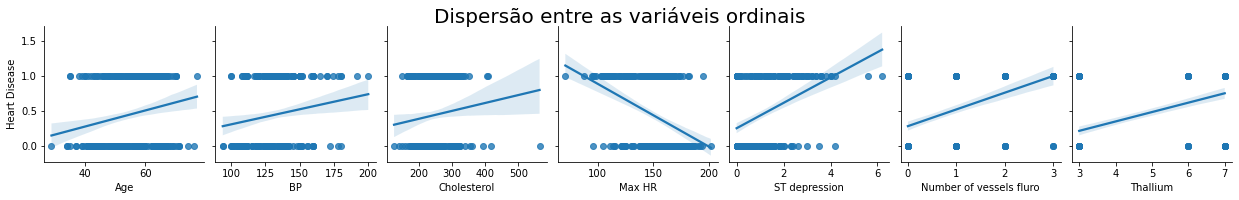

In [5]:
ax = sns.pairplot(dados, y_vars='Heart Disease', x_vars=['Age','BP', 'Cholesterol', 'Max HR', 'ST depression','Number of vessels fluro', 'Thallium'], kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis ordinais', fontsize=20, y=1.07)
ax

## Dispersão entre as variáveis booleanas

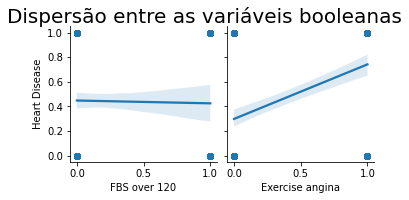

In [6]:
ax = sns.pairplot(dados, y_vars='Heart Disease', x_vars=['FBS over 120', 'Exercise angina'], kind='reg')
ax.fig.suptitle('Dispersão entre as variáveis booleanas', fontsize=20, y=1.07)
ax

pode-se perceber uma baixa relação entre "FBS over 120" e doenças do coração

## Dispersão entre as variáveis classificatórias

In [7]:
import matplotlib.pyplot as plt

In [8]:
classificatorias = dados[["Sex", "Chest pain type", "EKG results", "Slope of ST"]]

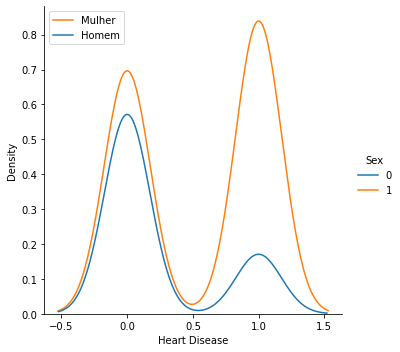

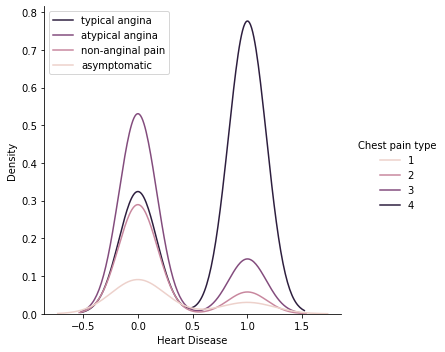

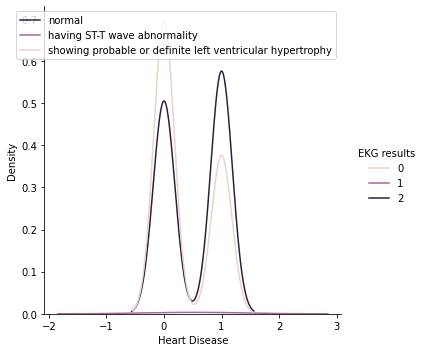

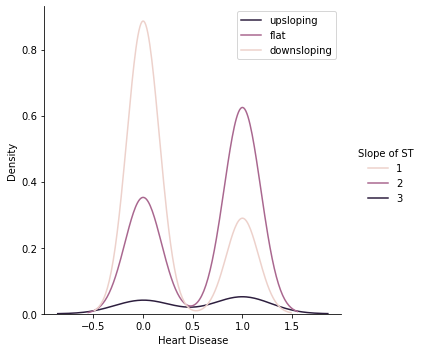

In [9]:
ax_sex = sns.displot(data=dados, x="Heart Disease", hue="Sex", kind="kde")
plt.legend(labels = ['Mulher', 'Homem'])

ax_chest_pain = sns.displot(data=dados, x="Heart Disease", hue="Chest pain type", kind="kde")
plt.legend(labels = ["typical angina", "atypical angina", "non-anginal pain", "asymptomatic"])

ax_EKG = sns.displot(data=dados, x="Heart Disease", hue="EKG results", kind="kde")
plt.legend(labels = ["normal", "having ST-T wave abnormality", "showing probable or definite left ventricular hypertrophy"])

ax_slope = sns.displot(data=dados, x="Heart Disease", hue="Slope of ST", kind="kde")
plt.legend(labels = ["upsloping", "flat", "downsloping"])


In [10]:
%%capture --no-display
!pip install pandas-profiling

from pandas_profiling import ProfileReport

profile = ProfileReport(dados)
profile.to_file("Relatorio_coracao.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Removendo váriavel irrelevante

In [11]:
dados.drop("FBS over 120", axis=1, inplace=True)

In [12]:
# Dataset atualizado:
dados.head(0)

,Age,Sex,Chest pain type,BP,Cholesterol,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease


# Modelando

In [13]:
# Separando X do Y
y = dados['Heart Disease']
X = dados.drop('Heart Disease', axis=1)

In [14]:
# X = dataframe apenas com variaveis explicativas
X.head(0)

,Age,Sex,Chest pain type,BP,Cholesterol,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium


In [15]:
# Dividindo o dataset entre treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=61)

In [16]:
# Treinamento do modelo Bayesiano
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [17]:
# Salvando o vetor de predição em y_previsto
y_previsto = gnb.predict(X_test)
y_train_previsto = gnb.predict(X_train)

## Obtendo valor de acurácia:

In [19]:
# Comparação entre os valores de teste (y_test) com os valores previstos (y_previsto)
from sklearn.metrics import accuracy_score
print(f"Acurácia do modelo Gaussiano = {accuracy_score(y_test, y_previsto)*100:.2f}%")

# Acurácia do modelo de Treino
print(f"Acurácia do modelo Treinamento = {accuracy_score(y_train, y_train_previsto)*100:.2f}%")

Acurácia do modelo Gaussiano = 82.72%
Acurácia do modelo Treinamento = 87.30%


## Obtendo matriz de confusão:

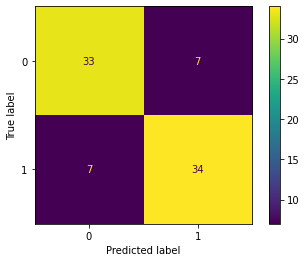

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matriz_confusao = confusion_matrix(y_test, y_previsto)

matriz_confusao_display = ConfusionMatrixDisplay(matriz_confusao).plot()